In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Janice\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Janice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Janice\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## MSEIRS Equations
Reference: 
- https://www.freecodecamp.org/news/how-to-model-an-epidemic-with-r/ 
- https://repositorium.sdum.uminho.pt/bitstream/1822/60583/1/preprint.pdf

In our MSEIRS system, we make the below assumptions:
1. The death rate and born rate are the same, which means the number of population will not change over time.
2. Both passive maternally-derived immunity and temporary immunity weakened at the same rate

In [2]:
# define the SEIR function
def MSEIRS_model(time, current_state, beta, sigma, gamma, delta, lam):
    M, S, E, I, R = current_state
    
    N = M + S + E + I + R
    # -weakend rate * infant with immunity + new born rate * new born with immunity prob
    dM = -delta * M + lam * I * R / N
    # - contact rate * contact probabilities 
    # + new born losing passive immunity rate 
    # + new born rate * new born without immunity prob
    dS = -(beta * S * I) / N + delta * M + lam * I * (1 - R / N) + delta * R
    dE = (beta * S * I) / N - sigma * E
    # infectious rate - recovery rate - death rate
    dI = sigma * E - gamma * I - lam * I
    # recovery rate + immunity weakened rate
    dR = gamma * I - delta * R
    
    return [dM, dS, dE, dI, dR]

## Initial Parameters
beta = 0.5 : Transmission/Contact rate  
sigma = 0.25 : Infectious rate  
gamma = 0.2 : Recovery rate  
delta = 0.1 : Immunity weakened rate  
lambda = 0.05 : Birth/Death rate 
days = 365 : Number of days to simulate

In [3]:
# initialise parameters
params = {
    'delta': 0.1,
    'beta': 0.5,
    'sigma': 0.25,
    'gamma': 0.2,
    'lam': 0.05
}

times = np.arange(0, 366)

## S - Susceptible, E - Exposed, I - Infectious, R - Recovered
M = 0: The initial number of new born with maternal immunity is set to 0.  
S = 999999: The initial number of susceptible individuals is set to 999,999.  
E = 1: The initial number of exposed individuals is set to 1.  
I = 0: The initial number of infectious individuals is set to 0.  
R = 0: The initial number of recovered individuals is set to 0.  

In [4]:
# initialise the initialise state of SEIR
initial_state = [0, 999999, 1, 0, 0]

## solve_ivp
To solve equation with respect to time

In [5]:
from scipy.integrate import solve_ivp

In [6]:
# Solve the SEIR model using solve_ivp
solution = solve_ivp(lambda t, y: MSEIRS_model(t, y, **params), [times[0], times[-1]], initial_state, t_eval=times)

## Summary of model's statistics

In [7]:
# Access the solution arrays
M = solution.y[0]
S = solution.y[1]
E = solution.y[2]
I = solution.y[3]
R = solution.y[4]

# Calculate summary statistics
summary_M = np.mean(M), np.min(R), np.max(R), np.percentile(R, [25, 50, 75])
summary_S = np.mean(S), np.min(S), np.max(S), np.percentile(S, [25, 50, 75])
summary_E = np.mean(E), np.min(E), np.max(E), np.percentile(E, [25, 50, 75])
summary_I = np.mean(I), np.min(I), np.max(I), np.percentile(I, [25, 50, 75])
summary_R = np.mean(R), np.min(R), np.max(R), np.percentile(R, [25, 50, 75])

list_summary = [summary_M, summary_S, summary_E, summary_I, summary_R]
summary_names = ['M', 'S', 'E', 'I', 'R']

for i in range(len(list_summary)):
    print("Summary of", summary_names[i], ":")
    print("Mean:", list_summary[i][0])
    print("Minimum:", list_summary[i][1])
    print("Maximum:", list_summary[i][2])
    print("25th Percentile:", list_summary[i][3][0])
    print("50th Percentile (Median):", list_summary[i][3][1])
    print("75th Percentile:", list_summary[i][3][2])
    print()


Summary of M :
Mean: 9166.542410721022
Minimum: 0.0
Maximum: 252928.14100600407
25th Percentile: 4351.727327386312
50th Percentile (Median): 242534.7126586375
75th Percentile: 242654.6535807967

Summary of S :
Mean: 665087.734951661
Minimum: 477812.0188290194
Maximum: 999999.0
25th Percentile: 499977.3003099579
50th Percentile (Median): 500095.4486719165
75th Percentile: 985075.9256793732

Summary of E :
Mean: 84078.09298385859
Minimum: 0.7639702705028147
Maximum: 136110.24250252685
25th Percentile: 6178.261875744779
50th Percentile (Median): 121198.36750691898
75th Percentile: 121355.47751375215

Summary of I :
Mean: 82774.67354481466
Minimum: 0.0
Maximum: 134300.56993531832
25th Percentile: 4390.936402005011
50th Percentile (Median): 121241.37300019339
75th Percentile: 121375.40995049654

Summary of R :
Mean: 158892.95610894499
Minimum: 0.0
Maximum: 252928.14100600407
25th Percentile: 4351.727327386312
50th Percentile (Median): 242534.7126586375
75th Percentile: 242654.6535807967



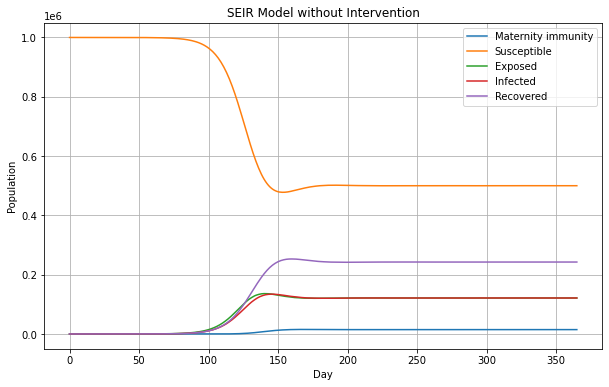

In [8]:
# Plotting the SEIR model
plt.figure(figsize=(10, 6))
plt.plot(times, M, label='Maternity immunity')
plt.plot(times, S, label='Susceptible')
plt.plot(times, E, label='Exposed')
plt.plot(times, I, label='Infected')
plt.plot(times, R, label='Recovered')
plt.xlabel('Day')
plt.ylabel('Population')
plt.title('SEIR Model without Intervention')
plt.legend()
plt.grid(True)
plt.show()

## Infection peak when there is no intervention taken

In [9]:
# Create a dataframe from the solution arrays
df_model = pd.DataFrame(
    {
        "Time": times,
        "Susceptible": solution.y[0],
        "Exposed": solution.y[1],
        "Infectious": solution.y[2],
        "Recovered": solution.y[3],
    }
)

# Extract the Infectious column
df_infections = df_model["Infectious"]

# Obtain the max number of people infected
peak_infections = df_infections.max()

# Obtain the n-day when the number of people infected is max
peak_time = df_infections.idxmax()

print(
    "The number of infections peaked on day",
    peak_time,
    "with",
    round(peak_infections),
    "people.",
)

The number of infections peaked on day 140 with 136110 people.
